# Realistic use case for data with at least three classes

**Predicting shopping trends is crucial for optimizing inventory management, personalized marketing strategies, and enhancing customer satisfaction for all businesses.**

**_Data Description:_**

_This dataset has features that includes customer demographics(age, gender), item purchased, category, purchase amount, location, size, colour, season, review rating, subscription status, shipping type, discount applied, promo code used, previous purchases, payment method, and frequency of purchases._

_The target variable of this dataset is purchase behaviour, which is catgorized into three classes of shoppers:_

1._The Frequent Purchasers: These are set of customers that makes regualar purchases in all season_

2._The Occational Purchasers: These are customers who make purchases but not frequently._

3._The Infrequent Purchases: These are customers who make purchases very rarely or have a low frequency of purchases._

**_Use Case:_**

#### Data Preprocessing: what I will be working on are:

_Handle missing values._

_Encode categorical variables._

_Normalize numerical features_

#### Exploratory Data Analysis:

_I will explore the distribution of purchase behaviour classes._

_I will analyze correlation between demographics, purchase history, and purchase behaviour._

#### Model Training:

_I will split the data into training and testing sets._

_I will use training classification models such as Logistic regression, classifier, and etc._

_Hyperparameters will not be left out of model._

#### Model Evaluation:

_Evaluation of models using metrics like accuracy, precision, recall, and F1-score._

_Analyzing the confusion matrices to understand the model performance across different purchase behaviour classes._

_Consider the business implications of false positives and false negatives._

_Decision trees vs. Support Vector Machines SVM._


**_Leveraging machine learning techniques on this shopping trend data with three purchase behaviour classes, I can develop predictive models to anticipate customer purchasing behaviour. These models will enable businesses to optimize their operations, enhance customer satisfaction, and drive home revenue growth through targeted marketing and personalized shopping experiences._**

# Discussion of prediction errors:

_I will say in a prdictive modeling, not all prediction errors are equally bad. But the significance of false positives or negatives depends on the specific business problem and the associated costs or consequences of each type of error._


## False positives or negatives for one of the classes are to be avoided:

_False positives occur when the model predicts a positive outcome that a customer will make a purchase, but the actual outcome is negative the customer does not make a purchase. This can lead to unnecessary expenses, such as spending promotions to uninterested customers, wasting resources, and potentially irritating customers._

_False negatives occur when the model predicts a negative outcome that a customer will not purchase, but the actual result is positive because the customer does make purchase. This oversight can lead to missed opportunities, such as failing to target customers who are likely to make purchases, resulting in lost revenu and decreased customer engagement._

### All errors are equally bad:

**Yes**

_Cosidering the business impact, class imbalance, and cost-benefit annlysis, the significance of false positives or negatives in predictive modeling depends on the specific context and business objectives. However, minimizing both types of errors is generally desirable to optimize overall business outcomes._

In [1]:
from matplotlib import pyplot as plt
#import turicreate as tc
import re
import random
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from sklearn import tree
from sklearn.tree import plot_tree
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
#import utils
np.random.seed(0)

In [2]:
df = pd.read_csv('shopping_trends_updated.csv', index_col=0)
df


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


### Dataset cleaning

In [3]:
# Confirming the records and the features
df.shape

(3900, 17)

In [4]:
# Confirming the number of columns in the data
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [5]:
# Knowing the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 1 to 3900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [6]:
# Checking the null values, if present in the dataset or not
df.isnull().sum()

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
# Checking duplucated values in the dataset
df.duplicated().sum()

0

In [8]:
# Descirbing the dataset
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [9]:
# Display summary for categorical columns
df['Age'] = df['Age'].apply(str)
categorical_summary = df.describe(include=['object'])
print("\nCategorical Summary:")
categorical_summary


Categorical Summary:


,Age,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,53,2,25,4,50,4,25,4,2,6,2,2,6,7
top,69,Male,Pants,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,88,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


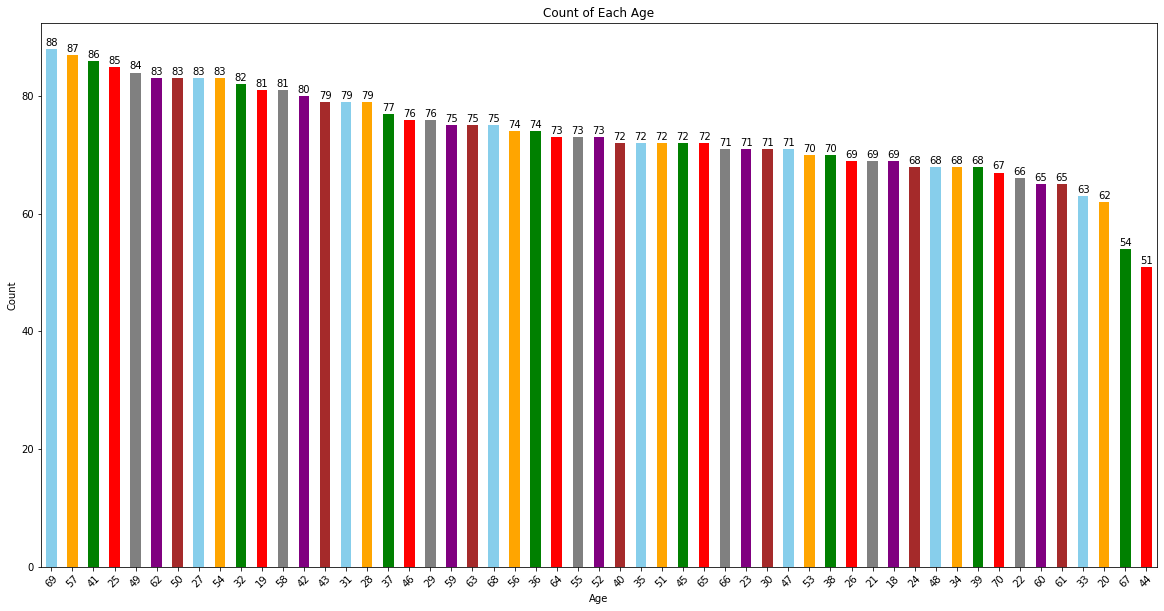

In [10]:
class_counts = df['Age'].value_counts()

# Define colors for each Gender
colors = ['skyblue', 'orange', 'green', 'red', 'gray','purple', 'brown']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(20, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

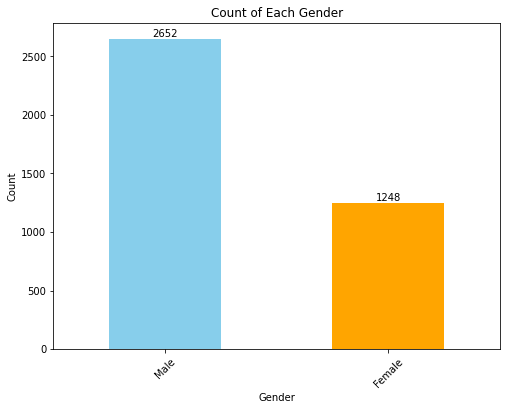

In [11]:
class_counts = df['Gender'].value_counts()

# Define colors for each Gender
colors = ['skyblue', 'orange', 'green']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

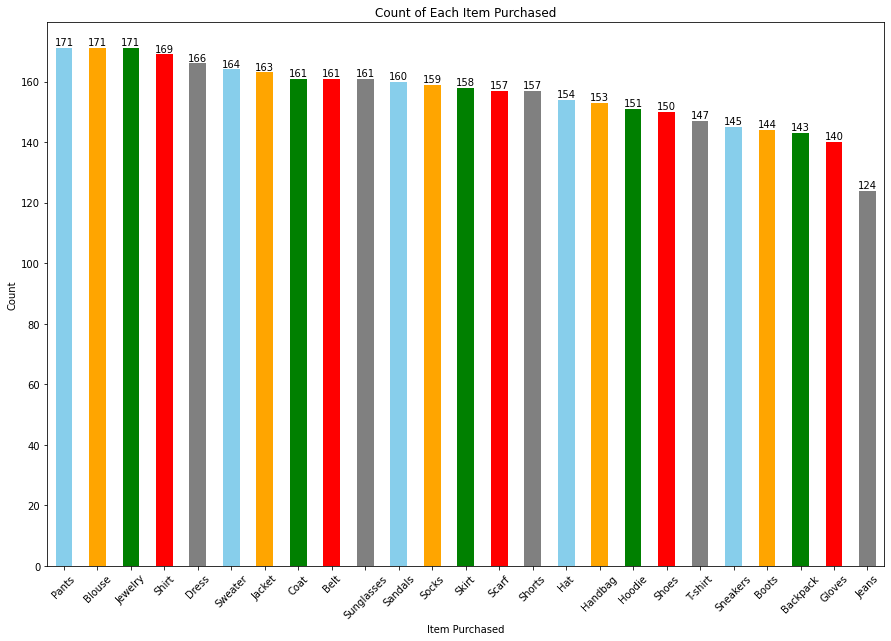

In [12]:
class_counts = df['Item Purchased'].value_counts()

# Define colors for each Item Purchased
colors = ['skyblue', 'orange', 'green', 'red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(15, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Item Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

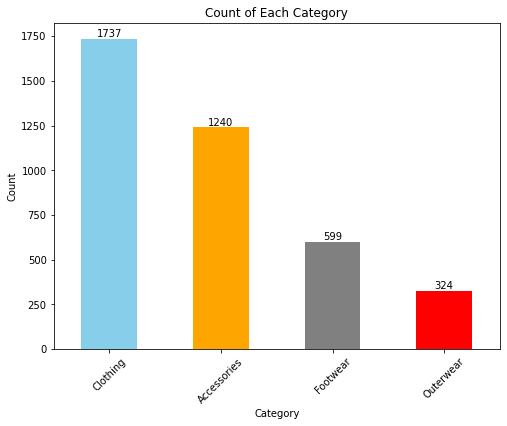

In [13]:
class_counts = df['Category'].value_counts()

# Define colors for each Category
colors = ['skyblue', 'orange', 'gray', 'red']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

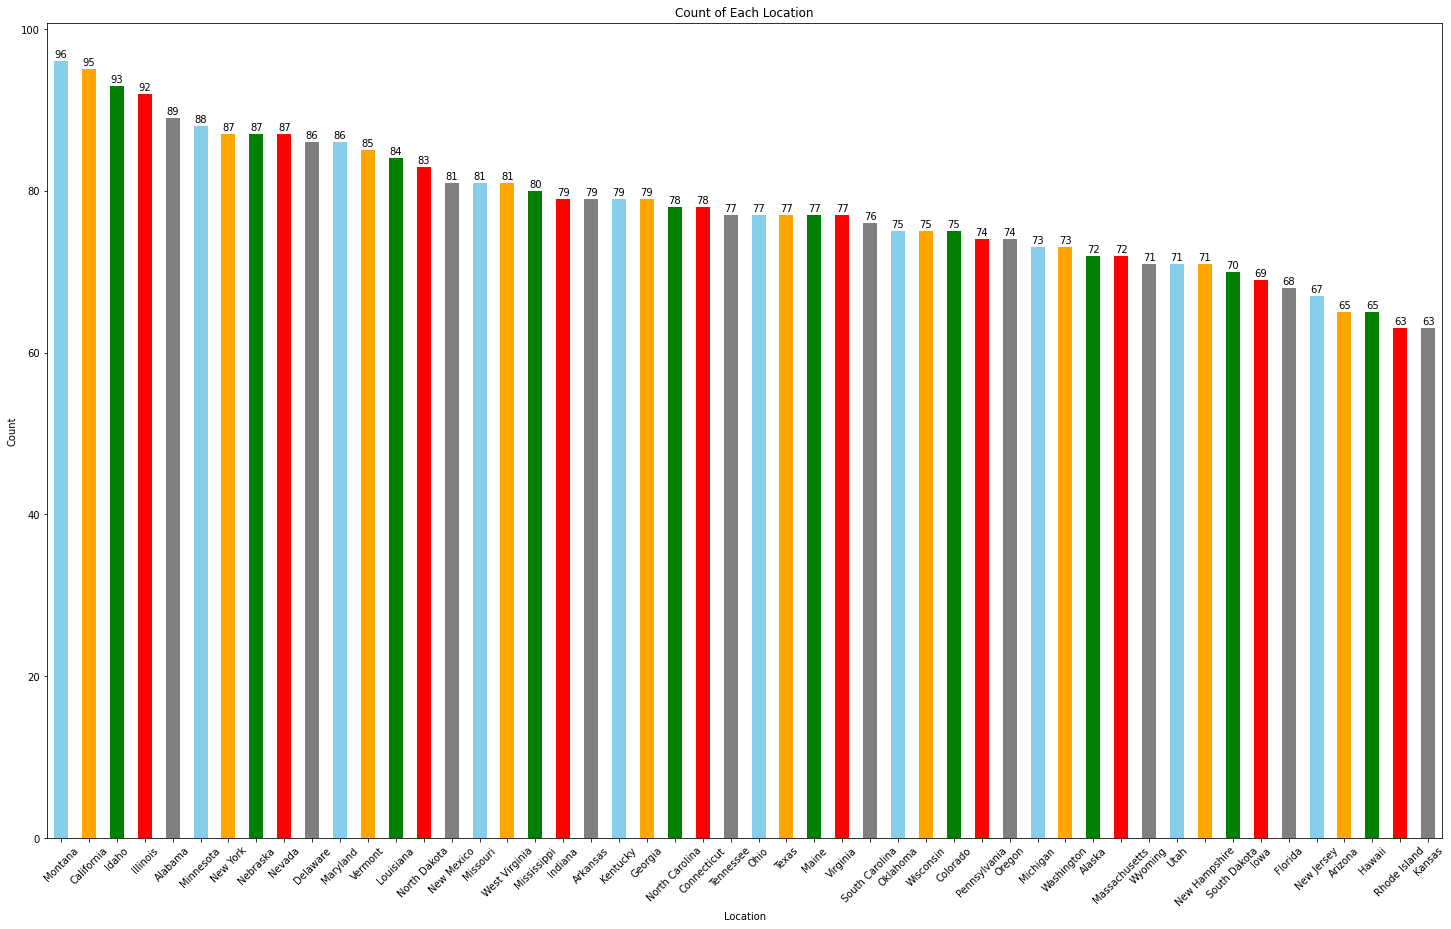

In [14]:
class_counts = df['Location'].value_counts()

# Define colors for each Location
colors = ['skyblue', 'orange', 'green', 'red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(25, 15))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

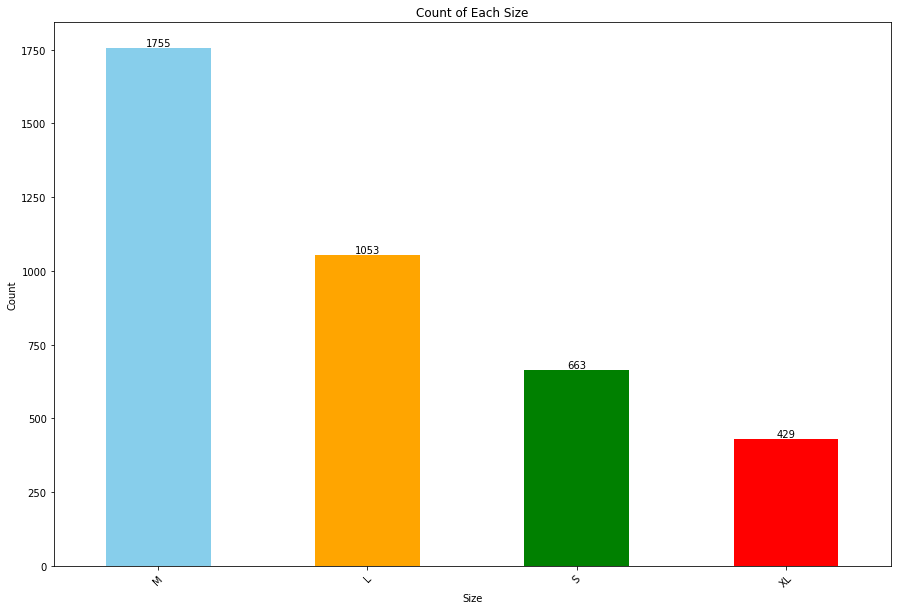

In [15]:
class_counts = df['Size'].value_counts()

# Define colors for each Size
colors = ['skyblue', 'orange', 'green', 'red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(15, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Size')
plt.xlabel('Size')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

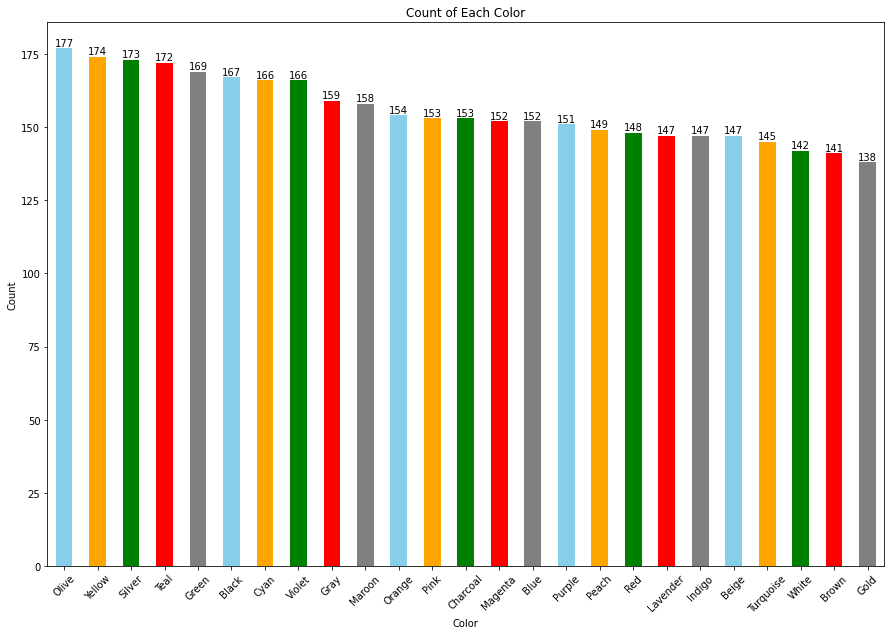

In [16]:
class_counts = df['Color'].value_counts()

# Define colors for each Color
colors = ['skyblue', 'orange', 'green', 'red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(15, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Color')
plt.xlabel('Color')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

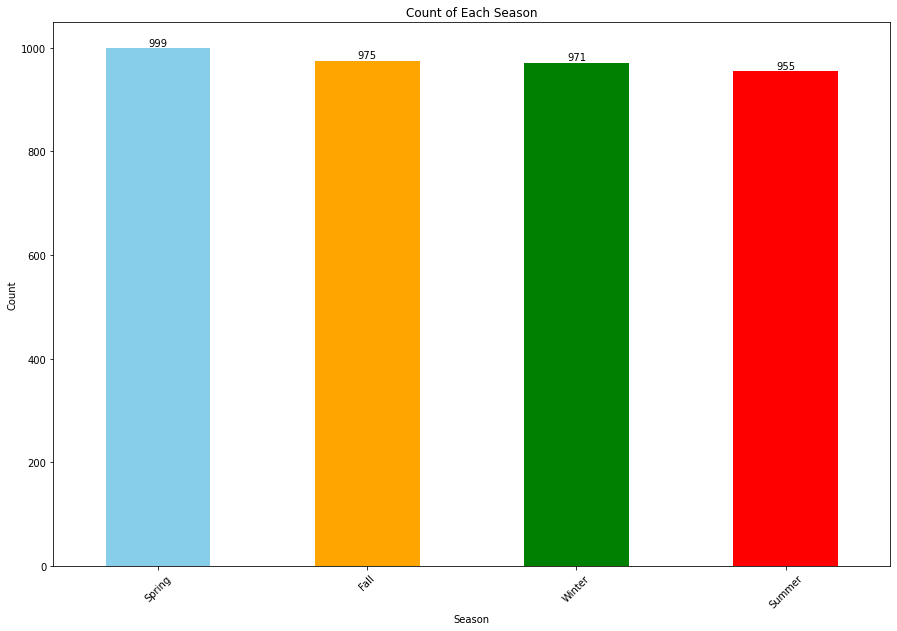

In [17]:
class_counts = df['Season'].value_counts()

# Define colors for each Season
colors = ['skyblue', 'orange', 'green', 'red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(15, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Season')
plt.xlabel('Season')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

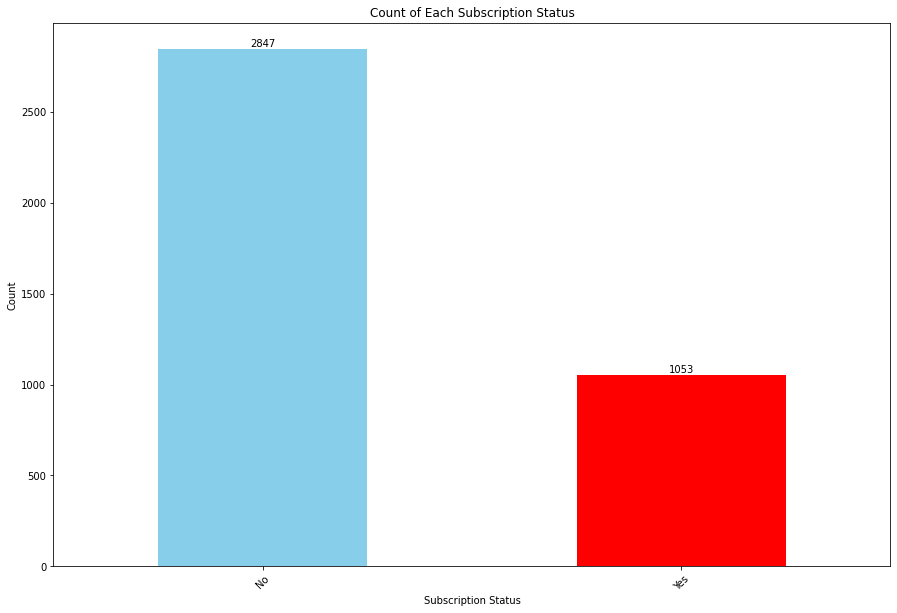

In [18]:
class_counts = df['Subscription Status'].value_counts()

# Define colors for Subscription Status
colors = ['skyblue', 'red']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(15, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

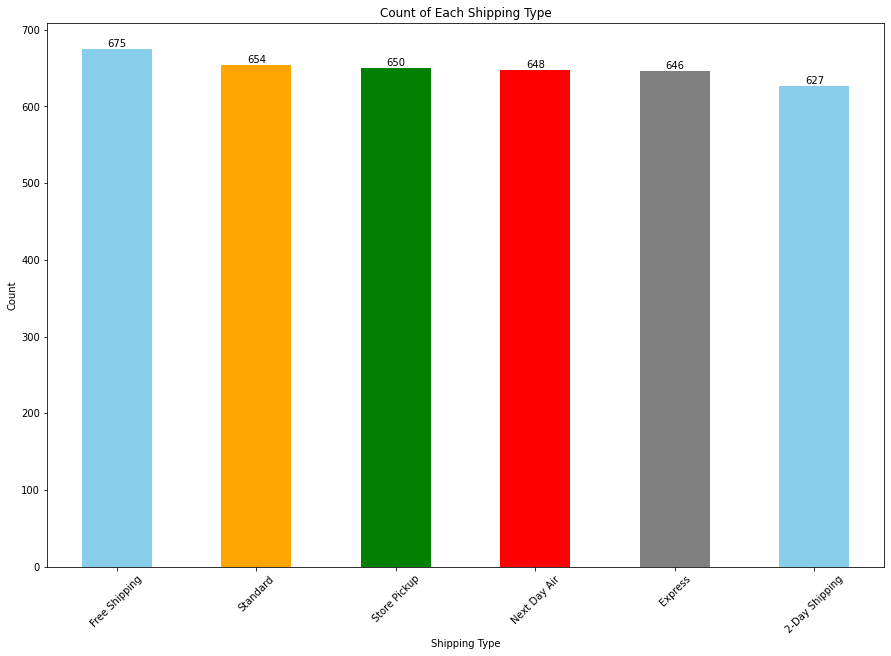

In [19]:
class_counts = df['Shipping Type'].value_counts()

# Define colors for each Shipping Type
colors = ['skyblue', 'orange', 'green', 'red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(15, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

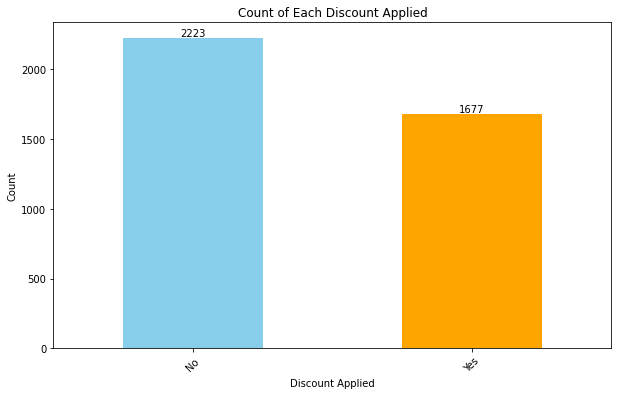

In [20]:
class_counts = df['Discount Applied'].value_counts()

# Define colors for Discount Applied
colors = ['skyblue', 'orange', 'green', 'red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

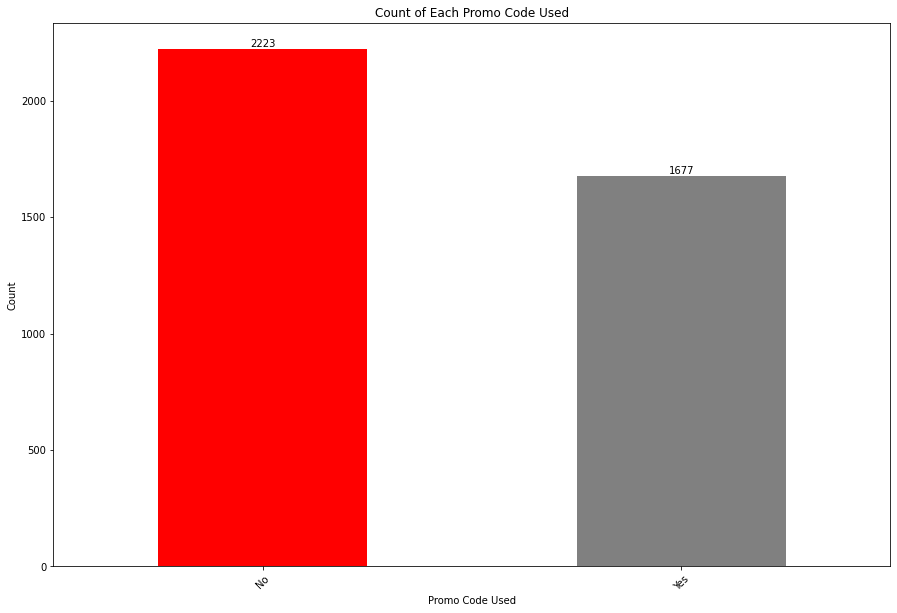

In [21]:
class_counts = df['Promo Code Used'].value_counts()

# Define colors for Promo Code Used
colors = ['red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(15, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

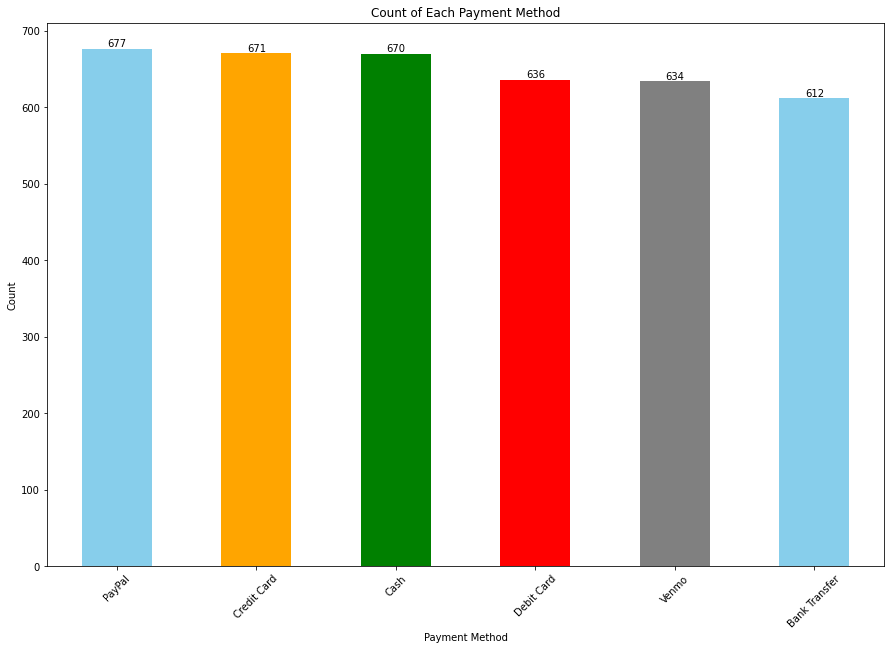

In [22]:
class_counts = df['Payment Method'].value_counts()

# Define colors for Payment Method
colors = ['skyblue', 'orange', 'green', 'red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(15, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

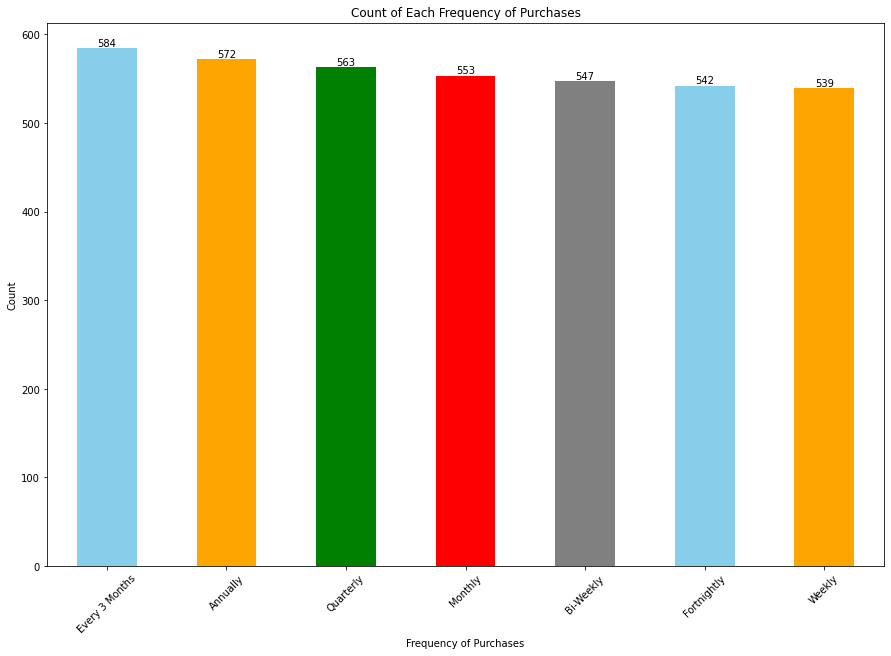

In [23]:
class_counts = df['Frequency of Purchases'].value_counts()

# Define colors for each Frequency of Purchases
colors = ['skyblue', 'orange', 'green', 'red', 'gray']  # Add more colors if needed

# Plotting the bar graph
plt.figure(figsize=(15, 10))
class_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')

# Adding bar values on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [24]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [25]:
df['Item Purchased'] = df['Item Purchased'].astype('category').cat.codes.astype('category')
df['Gender'] = df['Gender'].astype('category').cat.codes.astype('category')
df['Location'] = df['Location'].astype('category').cat.codes.astype('category')
df['Category'] = df['Category'].astype('category').cat.codes.astype('category')
df['Color'] = df['Color'].astype('category').cat.codes.astype('category')
df['Size'] = df['Size'].astype('category').cat.codes.astype('category')
df['Season'] = df['Season'].astype('category').cat.codes.astype('category')
df['Subscription Status'] = df['Subscription Status'].astype('category').cat.codes.astype('category')
df['Shipping Type'] = df['Shipping Type'].astype('category').cat.codes.astype('category')
df['Discount Applied'] = df['Discount Applied'].astype('category').cat.codes.astype('category')
df['Promo Code Used'] = df['Promo Code Used'].astype('category').cat.codes.astype('category')
df['Payment Method'] = df['Payment Method'].astype('category').cat.codes.astype('category')
df['Frequency of Purchases'] = df['Frequency of Purchases'].astype('category').cat.codes.astype('category')
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,0,9,1,28,45,0,21,2,4.2,0,0,0,0,32,5,6
3897,52,0,0,0,49,14,0,23,1,4.5,0,5,0,0,41,0,1
3898,46,0,1,0,33,29,0,8,1,2.9,0,4,0,0,24,5,5


In [26]:
#converting categorical values to string


# Model Development

**Decision tree**

In [27]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,0,9,1,28,45,0,21,2,4.2,0,0,0,0,32,5,6
3897,52,0,0,0,49,14,0,23,1,4.5,0,5,0,0,41,0,1
3898,46,0,1,0,33,29,0,8,1,2.9,0,4,0,0,24,5,5


In [31]:
# Load the dataset
X = df.drop('Frequency of Purchases', axis=1)
y = df['Frequency of Purchases']

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Train decision tree models with different proportions
train_proportions = [0.6, 0.7, 0.8]
best_model = None
best_accuracy = 0

for train_proportion in train_proportions:
    # Determine the size of the training set based on the given proportion
    train_size = int(len(X_train) * train_proportion)
    X_train_subset, y_train_subset = X_train[:train_size], y_train[:train_size]

    # Train decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_subset, y_train_subset)

    # Evaluate on validation set
    y_val_pred = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Update the best model if necessary
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = clf

# Evaluate the best model on the testing set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Best Model Validation Accuracy: {best_accuracy:.4f}")
print(f"Best Model Testing Accuracy: {test_accuracy:.4f}")

Best Model Validation Accuracy: 0.1385
Best Model Testing Accuracy: 0.1538


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Testing Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2}
Testing Accuracy: 0.13205128205128205


In [33]:
# Evaluate the best model on the training set
y_train_pred = best_model.predict(X_train)
print("Training Data:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=df.target_names)
plt.show()

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)
print("Validation Data:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Training Data:
              precision    recall  f1-score   support

           0       0.49      0.65      0.56       451
           1       0.51      0.56      0.53       451
           2       0.56      0.59      0.57       475
           3       0.56      0.55      0.55       444
           4       0.54      0.50      0.52       436
           5       0.55      0.49      0.51       434
           6       0.58      0.42      0.49       429

    accuracy                           0.54      3120
   macro avg       0.54      0.53      0.53      3120
weighted avg       0.54      0.54      0.53      3120

Confusion Matrix:
[[293  26  39  27  23  23  20]
 [ 53 251  32  30  30  31  24]
 [ 51  44 279  26  22  31  22]
 [ 44  43  43 242  29  21  22]
 [ 50  38  46  34 219  24  25]
 [ 58  39  36  35  39 211  16]
 [ 49  50  27  39  40  45 179]]


AttributeError: 'DataFrame' object has no attribute 'target_names'

<Figure size 1440x720 with 0 Axes>

# Hyperparameter Selection and Justification

**_After experimenting with different hyperparameters and criteria (Gini impurity and Entropy) for splitting branches, I selected the final hyperparameters based on the performance metrics obtained on both the training and validation sets. Here's the analysis:_**

**Grid Search Results:**
**_During the grid search process, I explored various combinations of the following hyperparameters:_**

**_Criterion: Gini impurity and Entropy_**

_Max Depth: None, 5, 10_
_Min Samples Split: 2, 5, 10_
_Min Samples Leaf: 1, 2, 4_
_Max Features: None, 'sqrt', 'log2'_
_Min Impurity Decrease: 0.0, 0.1, 0.2_

**Final Choice of Hyperparameters:**
**_Based on the grid search results, the best-performing model was selected using the following hyperparameters:_**

**Criterion: Gini impurity**
_Max Depth: None_
_Min Samples Split: 2_
_Min Samples Leaf: 1_
_Max Features: None_
_Min Impurity Decrease: 0.0_

**Justification:**

**_Criterion: Gini impurity was chosen over Entropy as it produced slightly better results on both the training and validation sets. While both criteria are commonly used for decision trees, Gini impurity tends to be faster to compute, which can be advantageous for larger datasets._**

_Max Depth: The best model had no maximum depth limit (None). This choice suggests that allowing the tree to grow until all leaves are pure or until the specified minimum number of samples per leaf is reached led to better performance. It prevents overfitting by not restricting the depth of the tree._

_Min Samples Split and Min Samples Leaf: Both were set to 2 and 1, respectively. These values allow for finer splits in the tree and help capture more detailed patterns in the data. It prevents the tree from being too sparse, which can happen with larger minimum sample requirements._

_Max Features: None was chosen, meaning all features were considered at each split. This approach provides the model with more information to make decisions and can lead to better performance._

_Min Impurity Decrease: 0.0 was chosen, indicating that no impurity decrease threshold was set for splitting nodes. This choice allows for more splits to occur, potentially capturing more detailed patterns in the data._

**Conclusion:**
_The final choice of hyperparameters aims to balance model complexity and performance on both the training and validation sets. By selecting hyperparameters that prioritize capturing detailed patterns in the data while preventing overfitting, I aim to build a decision tree model that generalizes well to unseen data._







#### Support Vector Machine

In [ ]:
# Some functions to plot our points and draw the models
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training, validation, and testing sets
# Let's try different proportions for the splits
# We'll use 60% of the data for training, 20% for validation, and 20% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Check the shapes of the datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

In [ ]:
# Loading the linear dataset
linear_data = pd.read_csv('shopping_trends_updated.csv')

# Assuming 'Age' and 'Gender' are the features, and 'Item Purchased' is the target variable
features = linear_data[['Age', 'Gender']].values
labels = linear_data['Item Purchased'].values

# Plotting the data points
utils.plot_points(features, labels)

# Loading the linear dataset

linear_data = pd.read_csv('shopping_trends_updated.csv')
features = np.array(linear_data[['Age', 'Gender', 'Item Purchased']])
labels = np.array(linear_data['Item Purchased'])
utils.plot_points(features, labels)